# Анализ внутривидовой изменчивости Df.

In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
data = pd.read_excel('data.xlsx', header=1)

In [4]:
num_features = ['L1p1l','L1p2l','W1p1l','W1p2l','L2p3l','L2p4l','W2p3l','W2p4l', 'S2p3l','S2p4l','Lkd','Wkd','OtnWLkd','Dvsh','Dosh','Lp','Dpl','Lns','Wns','Lvs','Wvs']
nonnum_features = ['Dp','Dvl','Dnl','Dc','Dvns','Dnns','Dvvs','Dnvs']
aux_features = ['Sp', 'idCP']
env_features = ['ALT', 'IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC']
data = data[num_features + nonnum_features + aux_features + env_features].dropna()
print('Исходный размер массива данных:', data.shape)

Исходный размер массива данных: (589, 38)


## Дисперсионный анализ (one way ANOVA)

In [5]:
datadum = pd.get_dummies(data, columns=nonnum_features)
dummies_nonnum = datadum.columns.difference(data.columns).tolist()
print('Data shape:', datadum.shape)
datadum[datadum.columns.difference(aux_features)] = datadum[datadum.columns.difference(aux_features)]/datadum[datadum.columns.difference(aux_features)].sum()
datadum = datadum.loc[datadum.Sp=='Df', :]

Data shape: (589, 69)


In [6]:
from collections import Counter
from scipy.stats import levene, f_oneway, kruskal

Сначала проверяем равенство дисперсий - потом выполняем тест Фишера, если неравны - непараметрический тест Крускала-Уоллиса.

Число уникальных районов:

In [7]:
print(datadum['idCP'].unique())

['IC1' 'IC2' 'BC3' 'BC4' 'BC5' 'BC6' 'ZC7' 'ZC8' 'ZC9' 'ZC10' 'AC11'
 'AC12' 'AC13' 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23'
 'A24' 'A25' 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'J33' 'J34' 'J35'
 'Kh36' 'Kh37' 'Kh38' 'Kh39' 'Kh40' 'Kh41' 'Kh42' 'Kh43' 'Kh44' 'Kh45'
 'Kh46' 'Kh47' 'Kh48' 'Kh49' 'Kh50' 'Kh51' 'PC52' 'P53' 'P54' 'MC55' 'M56'
 'M57' 'M58' 'M59' 'M60' 'M61' 'M62' 'M63' 'M64' 'M65' 'M66' 'M67' 'M68'
 'S69' 'S70' 'K71' 'K72' 'K73' 'K74' 'K75' 'K76' 'K77' 'K78' 'K79' 'K80'
 'K81' 'K82' 'K83' 'K84' 'K85' 'K86' 'K87' 'K88' 'K90' 'Ch91' 'Ch92'
 'Ch93' 'Ch94' 'Ch95' 'Ch96' 'Ch97' 'Ch98']


Число записей для каждого района:

In [8]:
counter = Counter(datadum['idCP'])
print(counter)

Counter({'ZC10': 20, 'AC12': 20, 'AC13': 20, 'BC5': 20, 'BC4': 20, 'ZC8': 20, 'BC6': 20, 'PC52': 20, 'IC2': 20, 'MC55': 20, 'ZC9': 20, 'AC11': 20, 'IC1': 20, 'ZC7': 20, 'BC3': 20, 'M60': 1, 'Ch92': 1, 'K79': 1, 'A21': 1, 'Kh46': 1, 'Kh45': 1, 'S69': 1, 'A19': 1, 'A16': 1, 'K90': 1, 'S70': 1, 'K80': 1, 'A17': 1, 'M68': 1, 'Kh40': 1, 'Kh36': 1, 'Kh38': 1, 'A15': 1, 'Kh41': 1, 'Ch96': 1, 'K86': 1, 'A22': 1, 'K87': 1, 'M56': 1, 'Kh50': 1, 'Ch97': 1, 'Ch91': 1, 'A24': 1, 'K73': 1, 'M65': 1, 'K74': 1, 'M58': 1, 'M62': 1, 'K85': 1, 'K83': 1, 'A32': 1, 'M64': 1, 'K82': 1, 'A31': 1, 'K78': 1, 'M67': 1, 'M61': 1, 'Kh49': 1, 'A14': 1, 'Kh48': 1, 'Kh43': 1, 'Ch93': 1, 'A18': 1, 'K72': 1, 'Kh47': 1, 'M57': 1, 'K84': 1, 'M66': 1, 'A27': 1, 'A25': 1, 'A20': 1, 'Ch95': 1, 'Ch98': 1, 'Kh51': 1, 'K81': 1, 'J35': 1, 'A28': 1, 'A29': 1, 'Kh44': 1, 'P53': 1, 'J34': 1, 'M63': 1, 'P54': 1, 'A30': 1, 'Kh39': 1, 'K88': 1, 'A23': 1, 'A26': 1, 'Kh42': 1, 'K75': 1, 'J33': 1, 'M59': 1, 'Ch94': 1, 'K77': 1, 'K76': 

Выделяем только районы, с количеством элементов > 1.

In [9]:
splitted = [datadum[datadum.idCP == x] for x in counter if counter[x] > 1]
places = [x for x in counter if counter[x] > 1]

In [10]:
len(splitted) # Итак - выделено 15 районов

15

In [11]:
anova = pd.DataFrame(columns=['test','p','stat','var'])
for var in num_features:
    res = [x[var].tolist() for x in splitted]
    if levene(*res).pvalue >= 0.05:
        anova = anova.append({'test': 'f', 'p': f_oneway(*res).pvalue, 'stat': f_oneway(*res).statistic, 'var': var}, ignore_index=True)
    else:
        anova = anova.append({'test': 'k', 'p': kruskal(*res).pvalue, 'stat': kruskal(*res).statistic, 'var': var}, ignore_index=True)

## Результаты дисперсионного анализа:

In [12]:
anova.sort_values(['stat', 'test'], ascending=False)

,test,p,stat,var
15,k,3.588796e-31,181.263127,Lp
16,k,2.228093e-28,167.462064,Dpl
2,k,5.700079e-27,160.473221,W1p1l
12,k,1.310619e-26,158.674530,OtnWLkd
3,k,2.685126e-26,157.123790,W1p2l
17,k,9.462450e-14,93.185357,Lns
8,k,2.953127e-12,85.264034,S2p3l
13,f,7.243949e-75,58.099104,Dvsh
7,f,7.146442e-42,25.119525,W2p4l
6,f,2.970907e-41,24.651234,W2p3l


Таким образом, наибольшие различия внутри df - наблюдаются по: Dvsh, W2p4l, W2p3l (первые три параметра); аналогично для случая неравных дисперсий (применялся тест Краскела-Уоллиса): Lp, Dpl, W1p1l.

In [13]:
len(anova['var'].unique()) == len(num_features) # Это (т.е True) означает, что зафиксированы значимые различия по всем параметрам

True

#### Визуализация различий (рассмотрим только те 6 признаков, которые показали максимальные различия)

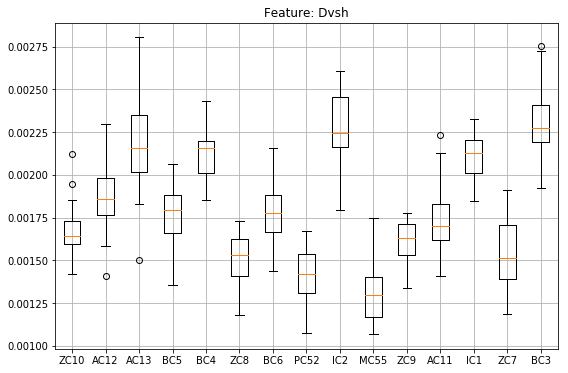

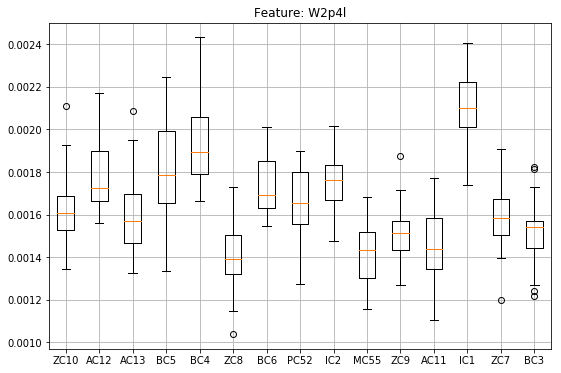

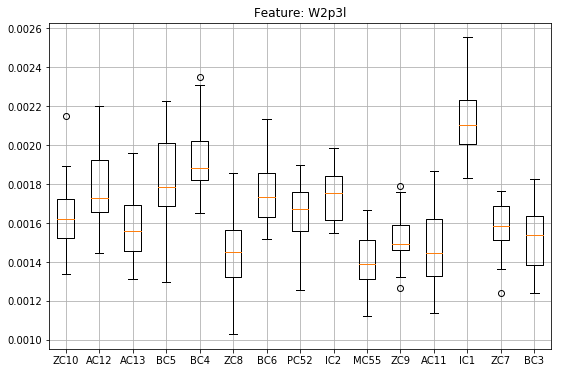

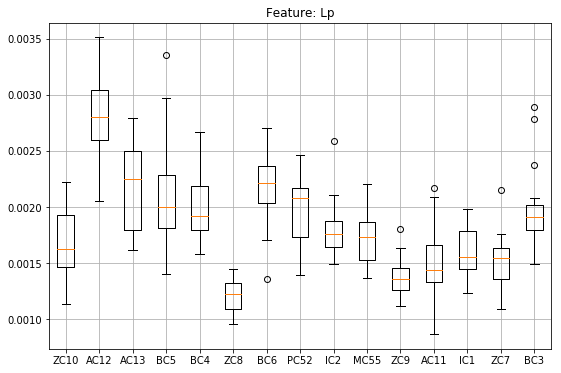

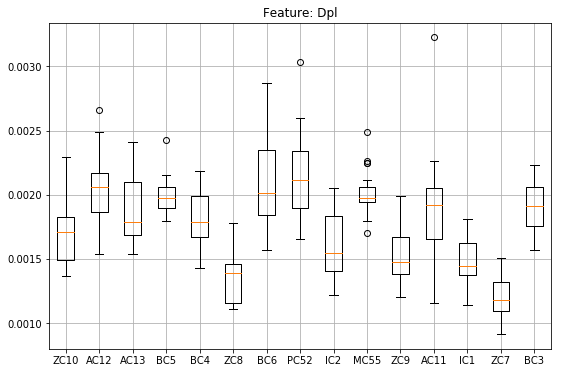

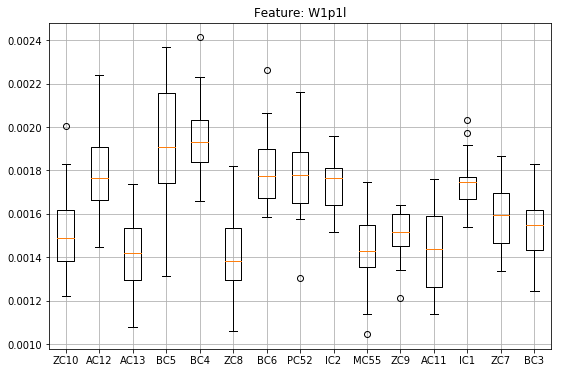

In [14]:
most_variable = ['Dvsh', 'W2p4l', 'W2p3l', 'Lp', 'Dpl', 'W1p1l']
for var in most_variable:
    res = [x[var].tolist() for x in splitted]
    f=plt.figure(figsize=(9,6))
    ax=f.add_subplot(111)
    ax.boxplot(res, labels=places)
    ax.set_title('Feature: %s' % var)
    ax.grid('on')
    

## Последующий анализ выявления различий (Post-hoc)

In [15]:
posthoc = pd.concat(splitted)

Comparison by var: Dvsh
Comparison by var: W2p4l
Comparison by var: W2p3l
Comparison by var: Lp
Comparison by var: Dpl
Comparison by var: W1p1l


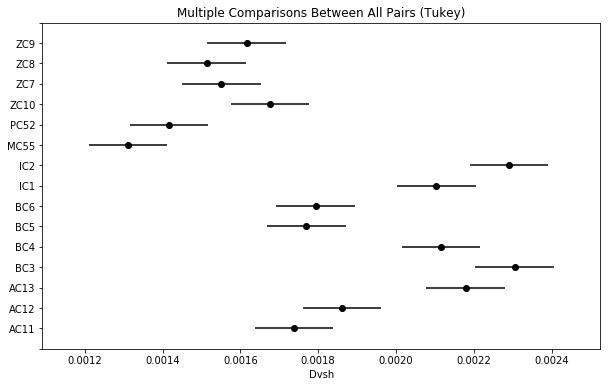

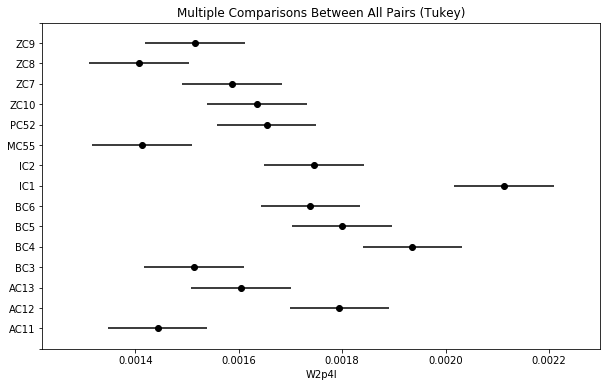

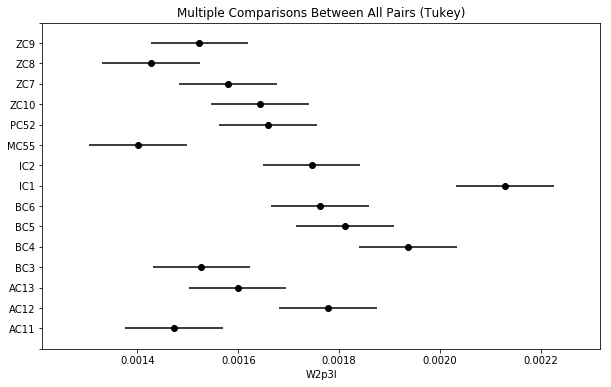

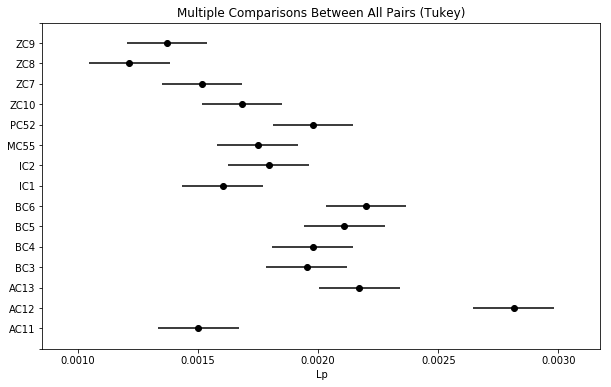

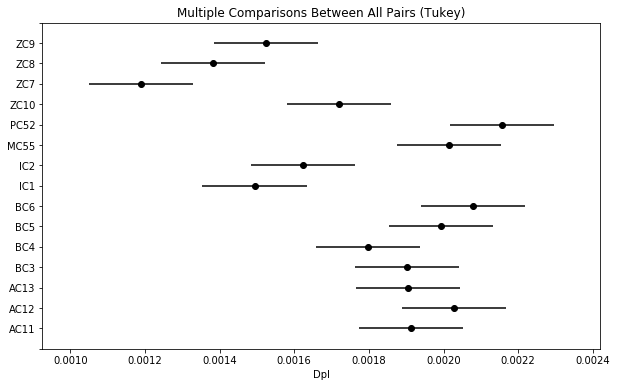

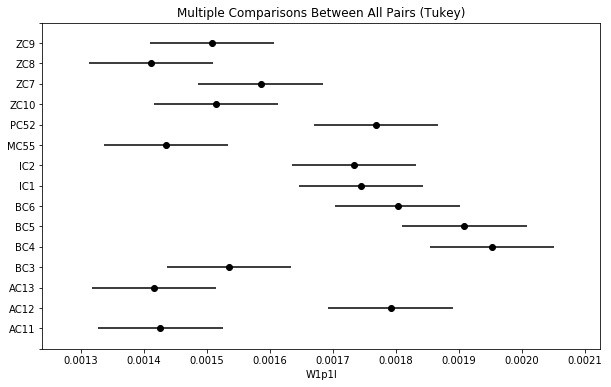

In [16]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
for var in most_variable:
    res = pairwise_tukeyhsd(posthoc[var], posthoc['idCP'], alpha=0.05)
    print('Comparison by var: %s' % var)
    res.plot_simultaneous(xlabel=var)


На графиках парных сравнений достаточно четко выделяются "эквивалентные" группы. Далее, нужно интерпретировать образование этих групп. Например, на первом рисунке, у нас четко вырисовывается группа в левом верхнем углу. Видимо здесь, для этой группы, сходные условия произрастания.
Зависимость параметров от факторов среды проведем с помощью канонического корреляционного анализа (CCA).

### Канонический корреляционный анализ (Canonical correlation analysis, CCA)

В анализе данного типа участвуют все записи (у которых вид Df), их общее число:

In [17]:
print('Dataset shape is:', datadum.shape)

Dataset shape is: (382, 69)


In [18]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2)

cca.fit(datadum[num_features], datadum[env_features])

CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [19]:
X_c, Y_c = cca.transform(datadum[num_features], datadum[env_features])

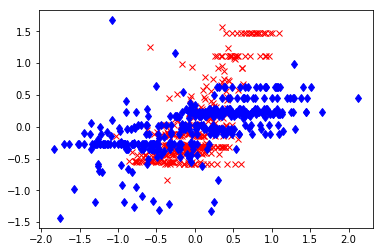

In [20]:
plt.plot(X_c[:, 0], Y_c[:, 0],'rx', X_c[:,1], Y_c[:,1], 'bd')

In [21]:
Y_c.shape, X_c.shape

((382, 2), (382, 2))

In [22]:
np.corrcoef(X_c[:,0], Y_c[:,0])

array([[1.        , 0.70453919],
       [0.70453919, 1.        ]])

In [23]:
np.corrcoef(X_c[:,1], Y_c[:,1])

array([[1.        , 0.58644251],
       [0.58644251, 1.        ]])

Анализ говорит о том, что найдены главные направления в зависимости между набором факторов и набором климатических данных. Самая большая главная корреляция - 0.7045, это существенное значение.
Рассмотрим вклады переменных в каждую из главных корреляций.

In [24]:
np.array(env_features)[np.argsort(np.abs(cca.y_weights_[:,0]))[::-1]]

array(['CK', 'Ann_PREC', 'IC', 'PN', 'IOE', 'WK', 'ALT'], dtype='<U8')

Наибольший вклад в корреляции оказывают IC, PN, CK, Ann_PREC; 

In [25]:
np.array(num_features)[np.argsort(np.abs(cca.x_weights_[:,0]))[::-1]]

array(['Lkd', 'L1p2l', 'Wkd', 'L2p4l', 'Dvsh', 'L2p3l', 'Dpl', 'W1p2l',
       'W2p3l', 'OtnWLkd', 'Lns', 'Wvs', 'W2p4l', 'S2p4l', 'Wns', 'L1p1l',
       'Dosh', 'Lvs', 'Lp', 'S2p3l', 'W1p1l'], dtype='<U7')

Переменные указаны в порядке взаимного влияния. Группа Ck, Ann_PREC, IC оказывает влияние в первую очередь на Lkd, L1p2l, Wkd ...

In [26]:
cca.y_weights_[:,0], env_features

(array([ 0.00274497, -0.44675745, -0.32442764,  0.02022573,  0.65786173,
         0.05263799,  0.50910221]),
 ['ALT', 'IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC'])

## Линейная регрессия

In [27]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
for var in num_features:
    y = datadum[var]
    X = datadum[env_features]
    lm.fit(X, y)
    args = np.argsort(np.abs(lm.coef_))[::-1]
    cf = np.array(lm.coef_)[args]
    nf = np.array(env_features)[args]
    print('Linear regression for var %s:'%var, '%1.3f' % lm.intercept_ + ''.join(['+%1.3f*%s'%(a, b) if a>0 else '%1.3f*%s'%(a, b) for a, b in zip(cf, nf)]))
    print('R2=', lm.score(X,y))


Linear regression for var L1p1l: 0.001+0.496*IC-0.286*CK-0.184*Ann_PREC+0.099*WK+0.057*ALT+0.039*PN+0.016*IOE
R2= 0.20135166934547136
Linear regression for var L1p2l: 0.001+0.537*IC-0.290*CK-0.174*Ann_PREC+0.106*WK+0.059*ALT+0.043*PN+0.008*IOE
R2= 0.2150180332213284
Linear regression for var W1p1l: 0.002+0.537*IC-0.413*CK-0.241*Ann_PREC+0.101*IOE-0.096*WK+0.055*ALT+0.019*PN
R2= 0.18270767619216377
Linear regression for var W1p2l: 0.002+0.617*IC-0.450*CK-0.228*Ann_PREC-0.121*WK+0.082*IOE+0.056*ALT+0.036*PN
R2= 0.17389709364552464
Linear regression for var L2p3l: 0.001+0.574*IC-0.318*CK-0.153*Ann_PREC+0.107*WK+0.054*ALT+0.051*PN-0.005*IOE
R2= 0.21994002211130104
Linear regression for var L2p4l: 0.001+0.580*IC-0.310*CK-0.165*Ann_PREC+0.111*WK+0.058*ALT+0.047*PN+0.000*IOE
R2= 0.2313948718861143
Linear regression for var W2p3l: 0.002+0.336*IC-0.325*CK-0.287*Ann_PREC+0.122*IOE+0.039*ALT-0.018*WK-0.017*PN
R2= 0.17573285720898657
Linear regression for var W2p4l: 0.002+0.379*IC-0.336*CK-0.288*A

## Lasso, LARs, etc. Обобщенные линейные модели

In [4]:
from sklearn import linear_model
clf = linear_model.ElasticNet(alpha=1000.1, l1_ratio=10.7, fit_intercept=True)
for var in num_features:
    y = datadum[var]
    X = datadum[env_features]
    clf.fit(X, y)
    print('R2=', clf.score(X,y), clf.coef_)

NameError: name 'num_features' is not defined

In [12]:
import pandas as pd
tocluster = pd.read_excel('cluster.xlsx')

In [13]:
tocluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 75 columns):
Sp            383 non-null object
Region        383 non-null object
PLANT_CODE    383 non-null object
POPUL_CODE    383 non-null object
LAT           383 non-null float64
LON           383 non-null float64
ALT           383 non-null int64
IC            383 non-null float64
PN            383 non-null float64
WK            383 non-null float64
CK            383 non-null float64
IOE           383 non-null float64
Ann_PREC      383 non-null float64
L1p1l         383 non-null float64
L1p2l         383 non-null float64
W1p1l         383 non-null float64
W1p2l         383 non-null float64
L2p3l         383 non-null float64
L2p4l         383 non-null float64
W2p3l         383 non-null float64
W2p4l         383 non-null float64
S2p3l         383 non-null float64
S2p4l         383 non-null float64
Lkd           383 non-null float64
Wkd           383 non-null float64
OtnWLkd       383 non-null

In [198]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [199]:
def RSS_elbow(X, y):
    '''AIC informational criterion'''
    rss = 0.0
    for val in np.unique(y):
        rss += np.sum((X[y==val, :] - np.mean(X[y==val, :], axis=0))**2)
    return 2 * len(np.unique(y)) + X.shape[0] * np.log(rss)
        

In [200]:
X = tocluster.iloc[:,13:].values

In [208]:
X = StandardScaler().fit_transform(X)

In [209]:
pca = PCA(n_components=3)

In [210]:
X_t=pca.fit_transform(X)


In [287]:
pca.explained_variance_ratio_

array([0.18960345, 0.14137788, 0.0948516 ])

In [211]:
elb = []
clusters = range(1, 10)
for k in clusters:
    km = cluster.KMeans(n_clusters=k)
    y_pred = km.fit_predict(X_t)
    elb.append(RSS_elbow(X_t, y_pred))
    

In [212]:
from pylab import *

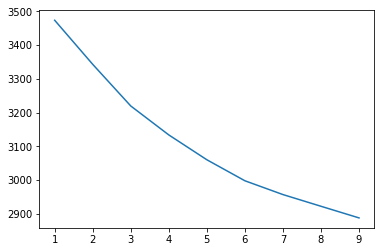

In [213]:
plot(clusters, elb)
show()

In [214]:
km = cluster.KMeans(n_clusters=3)
y_pred = km.fit_predict(X_t)

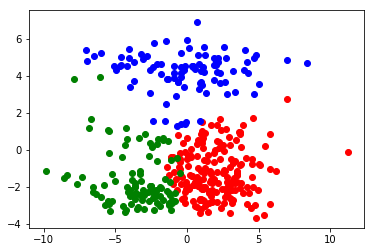

array(['ZC9', 'Kh37', 'Kh42', 'Kh44', 'Kh45', 'P53', 'P54', 'M61', 'M68',
       'K71', 'K85', 'K86', 'K88', 'Ch95', 'ZC8', 'ZC10', 'AC11', 'AC12',
       'AC13', 'A14', 'A15', 'A32', 'Kh47', 'Kh48', 'K79', 'Ch94', 'IC1',
       'IC2', 'BC3', 'BC4', 'BC5', 'BC6', 'ZC7', 'A16', 'A17', 'A18',
       'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'A29', 'A30', 'A31', 'J33', 'J34', 'J35', 'Kh36', 'Kh38',
       'Kh39', 'Kh40', 'Kh41', 'Kh43', 'Kh46', 'Kh49', 'Kh50', 'Kh51',
       'PC52', 'MC55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M62', 'M63',
       'M64', 'M65', 'M66', 'M67', 'S69', 'S70', 'K72', 'K73', 'K74',
       'K75', 'K76', 'K77', 'K78', 'K80', 'K81', 'K82', 'K83', 'K84',
       'K87', 'K89', 'K90', 'Ch91', 'Ch92', 'Ch93', 'Ch96', 'Ch97',
       'Ch98'], dtype=object)

In [286]:
y[X_t[:,1]>2] = 0
y[X_t[:,1]<2] = 1
for val, col in zip(np.unique(y_pred),['r','g','b','k','c']):
    scatter(X_t[y_pred==val,0], X_t[y_pred==val,1], c=col)
show()
tocluster.POPUL_CODE.unique()

In [280]:
factors = tocluster.loc[:,['WK', 'CK', 'ALT', 'Ann_PREC']].values
factors

array([[  36.78815982, -109.79558545,  648.        ,  437.18848497],
       [  36.78815982, -109.79558545,  648.        ,  437.18848497],
       [  36.78815982, -109.79558545,  648.        ,  437.18848497],
       ...,
       [  11.1857288 , -132.4667805 ,   39.        ,  390.40273999],
       [  11.1857288 , -132.4667805 ,   39.        ,  390.40273999],
       [   9.37648199, -173.93518777,  152.        ,  467.40884515]])

In [261]:
factors = StandardScaler().fit_transform(factors)

In [262]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True, n_components=3)
lda.fit(factors, y_pred).predict(factors)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,

In [263]:
from scipy.stats import kruskal

Parameter: ALT
Kruskall-Wallis test:  KruskalResult(statistic=19.972951900882588, pvalue=4.6018091264167934e-05)
Parameter: IC
Kruskall-Wallis test:  KruskalResult(statistic=3.2512759510586373, pvalue=0.1967860904382399)
Parameter: PN
Kruskall-Wallis test:  KruskalResult(statistic=8.568238843115747, pvalue=0.013785755617203731)
Parameter: WK
Kruskall-Wallis test:  KruskalResult(statistic=56.957219857454376, pvalue=4.284467528190482e-13)
Parameter: CK
Kruskall-Wallis test:  KruskalResult(statistic=38.450829776580235, pvalue=4.472068032174716e-09)
Parameter: IOE
Kruskall-Wallis test:  KruskalResult(statistic=4.215593374985273, pvalue=0.12150538605750862)
Parameter: Ann_PREC
Kruskall-Wallis test:  KruskalResult(statistic=89.52527378827631, pvalue=3.6293913634318714e-20)


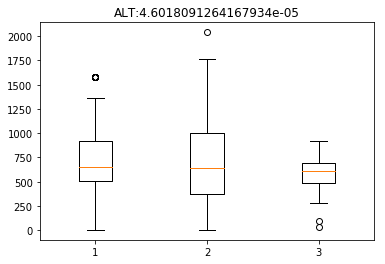

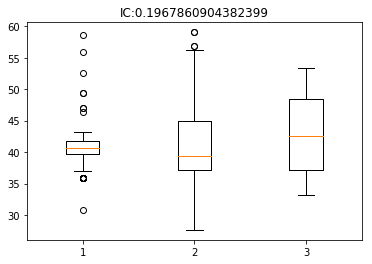

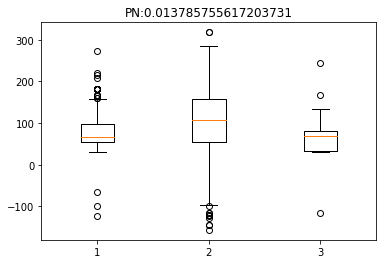

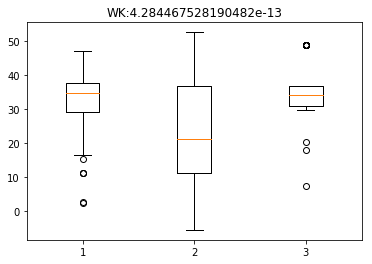

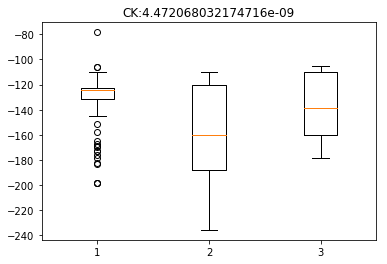

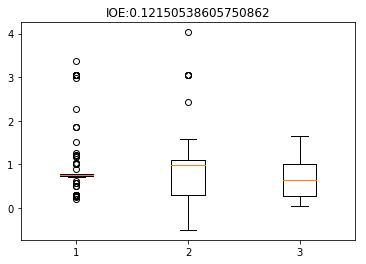

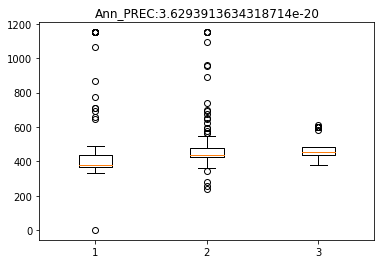

In [276]:
for par in tocluster.columns[6:13]:
    print("Parameter:", par)
    kr = kruskal(*[tocluster.loc[y_pred==val, par].values for val in np.unique(y_pred)])
    figure()
    boxplot([tocluster.loc[y_pred==val, par].values for val in np.unique(y_pred)])
    title(par + ':' + str(kr.pvalue))
    print("Kruskall-Wallis test: ", kr)
  
show()

In [265]:
proj=lda.transform(factors)

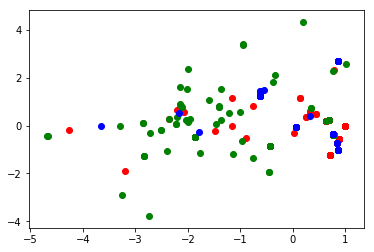

In [266]:
for val, col in zip(np.unique(y_pred),['r','g','b','k','c']):
    scatter(proj[y_pred==val,0], proj[y_pred==val,1], c=col)
show()

In [176]:
proj

array([[ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.34266   ],
       [ 0.14833627],
       [-0.54314665],
       [-0.6392328 ],
       [ 0.2097193 ],
       [-1.91291746],
       [-1.91291746],
       [-0.51130307],
       [-0.38745153],
       [ 2.347001  ],
       [ 0.9848199 ],
       [ 1.03248762],
       [-2.47409242],
       [ 2.83367025],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0.29918656],
       [ 0